In [23]:
from manim import *

config.media_width = "75%"
config.verbosity = "WARNING"

In [24]:
CRANK_RADIUS = 0.2

TITLE_COLOR =  BLACK

TEXT_COLOR = BLACK
BGTEXT_COLOR = WHITE

OFFSET = np.array([-5, -2, 0])

TRANSFORM_COLOR = GOLD_C

BACKGROUND_COLOR = WHITE

RED_CUSTOM = RED_E
BLUE_CUSTOM= BLUE_E
PURPLE_CUSTOM= PURPLE_E
NOTE_COLOR = DARK_GRAY

GRID_COLOR = GRAY_A

AXIS_COLOR = BLACK

grid_dots = []
for x in range(-7, 8):
    for y in range(-4, 5):
        grid_dots.append(Dot(np.array([x, y, 0]), color=GRID_COLOR))
grid = Group(*grid_dots)

note_labels = {-2 : "A", -1 : "B", 0 : "C", 1  : "D", 2 : "E", 3 : "F", 4 : "G", 5 : "A", 6: "B"}

ax = Axes(
            x_range=[-2, 12, 1],
            y_range=[-2, 6, 1],
            x_length=14,
            y_length=8,
            tips=False,
            x_axis_config={"include_numbers": True},
            y_axis_config={"label_direction": 1.5*UP + LEFT}
        )

ax.get_y_axis().add_labels(note_labels)

num_ax = Axes(
            x_range=[-2, 12, 1],
            y_range=[-2, 6, 1],
            x_length=14,
            y_length=8,
            tips=False,
            axis_config={"include_numbers": True},
        )

num_ax.color = AXIS_COLOR

note_labels = {-2 : "A", -1 : "B", 0 : "C", 1  : "D", 2 : "E", 3 : "F", 4 : "G", 5 : "A", 6: "B"}

midi_ax = Axes(
            x_range=[-2, 12, 1],
            y_range=[-2, 6, 1],
            x_length=14,
            y_length=8,
            tips=False,
            x_axis_config={"include_numbers": True},
            y_axis_config={"label_direction": 1.5*UP + LEFT},
        )

midi_ax.get_y_axis().add_labels(note_labels)

midi_ax.color = AXIS_COLOR

#### Cranks

def create_crank(start, end, color = TRANSFORM_COLOR, crank_radius = CRANK_RADIUS) :
    crank_dot = Dot(start, color = color)

    crank_len = np.linalg.norm(end - start)
    crank_line = Line(start, start + (end - start) * (crank_len - crank_radius) / crank_len)
    crank_line.color = color

    crank_arc = Arc(arc_center=end , angle=PI*5/4, start_angle= crank_line.get_angle()+ 3*PI/8, radius=crank_radius)
    crank_arc.color = color
    return VGroup(* [crank_dot,crank_line,crank_arc])


def unit_vector(vector):
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

def change_crank(crank, start, end) :
    old_vect = crank[1].get_vector()
    crank[0].move_to(start)
    crank_len = np.linalg.norm(end - start)
    crank[1].put_start_and_end_on(
        start,
        start + (end - start) * (crank_len - CRANK_RADIUS) / crank_len
    )
    new_vect = crank[1].get_vector()
    angle_diff = angle_between(old_vect,new_vect)
    crank[2].move_arc_center_to(end)
    crank[2].rotate(-angle_diff, about_point = end)


##### Cursors

def create_cursor(origin, color = TRANSFORM_COLOR):
    cursor_origin = Dot(origin, color = color)
    cursor_horizontal = Line(
        7 * LEFT + origin[1] * UP,
        7 * RIGHT + origin[1] * UP
    )
    cursor_horizontal.color = color
    cursor_vertical = Line(
        4 * DOWN + origin[0] * RIGHT,
        4 * UP + origin[0] * RIGHT
    )
    cursor_vertical.color = color
    return VGroup(*[cursor_origin,cursor_horizontal,cursor_vertical])

def shift_cursor(cursor, shifter) :
    cursor[0].move_to(cursor[0].get_center() + shifter)
    cursor[1].put_start_and_end_on(
        cursor[1].start + UP * shifter[1],
        cursor[1].end + UP * shifter[1],
    )
    cursor[2].put_start_and_end_on(
        cursor[2].start + RIGHT * shifter[0],
        cursor[2].end + RIGHT * shifter[0],
    )





Manim Community v0.18.1

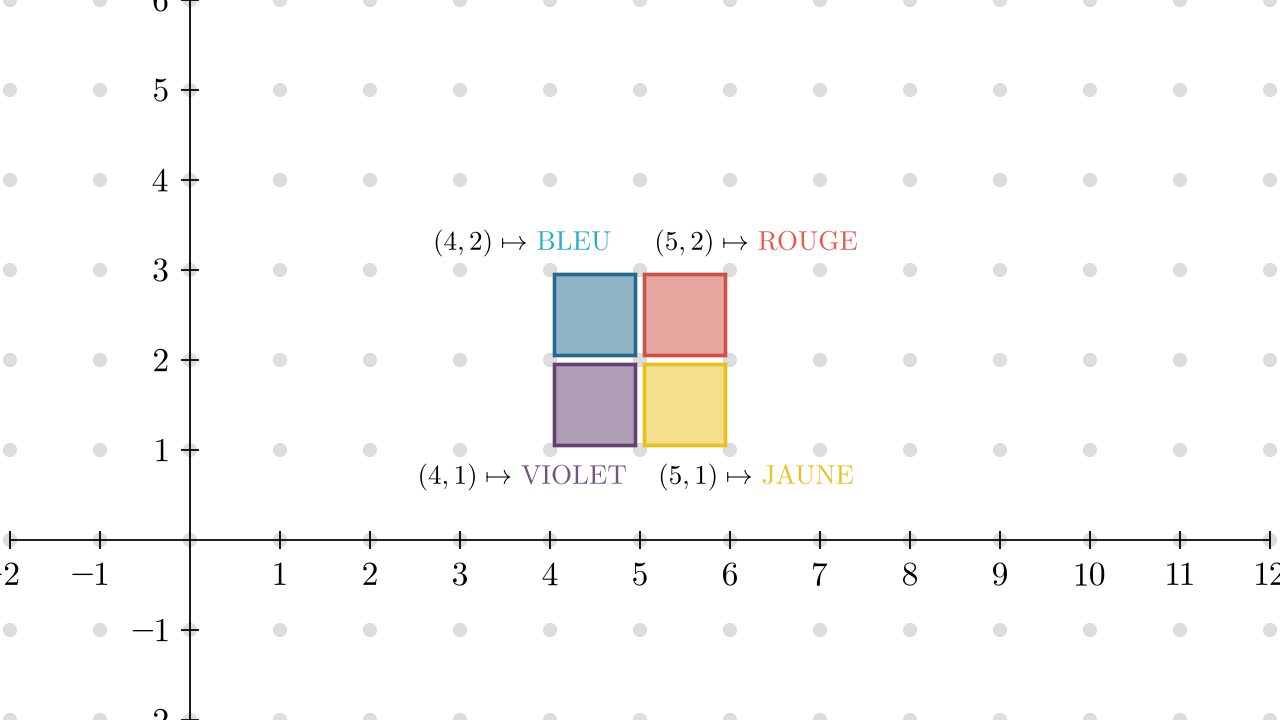

In [25]:
%%manim -qm FourPixels

SIZE_SQUARE = 0.9
class FourPixels(Scene) :
  def construct(self) :
    self.camera.background_color = BACKGROUND_COLOR

    # transition = FullScreenRectangle(fill_opacity = 1)
    # transition.color = WHITE
    # transition.fill_opacity = 1

    self.add(grid)
    self.add(num_ax)
    # self.add(transition)

#     comment = Tex('''A pattern is a partial function

# that associates a point of the space to an atom, here a color.

# Here, a 4 pixel pattern.''').to_edge(UR)
#     comment.height = 1.0
#     self.add(comment)

    square1 = Square(
      side_length = SIZE_SQUARE,
      color = RED_CUSTOM,
      fill_opacity = 0.5)
    square1.move_to(UR/2)


    square2 = square1.copy()
    square2.shift(LEFT)
    square2.color = BLUE_CUSTOM

    square3 = square2.copy()
    square3.shift(DOWN)
    square3.color = PURPLE_CUSTOM

    square4 = square3.copy()
    square4.shift(RIGHT)
    square4.color = YELLOW_E

    squares = VGroup(*[square1,square2,square3, square4])
    #self.add(squares)


    label1 = Tex("$(5,2) \mapsto $"," ROUGE")
    label1.height = 0.3
    label1.move_to(UR * 1.3)
    label1[0].color = BLACK
    label1[1].color = RED_D

    label2 = Tex("$(4,2) \mapsto $"," BLEU")
    label2.height = 0.3
    label2.move_to(UL * 1.3)
    label2[0].color = BLACK
    label2[1].color = BLUE_D

    label3 = Tex("$(4,1) \mapsto $"," VIOLET")
    label3.height = 0.3
    label3.move_to(DL * 1.3)
    label3[0].color = BLACK
    label3[1].color = PURPLE_D

    label4 = Tex("$(5,1) \mapsto $"," JAUNE")
    label4.height = 0.3
    label4.move_to(DR * 1.3)
    label4[0].color = BLACK
    label4[1].color = YELLOW_E

    labels = VGroup(*[label1,label2,label3, label4])
    #self.add(labels)

    self.add(num_ax)
    self.add(squares)
    self.add(labels)
    # self.play(
    #   # FadeOut(transition),
    #   Create(num_ax),
    #   # FadeIn(comment),
    #   FadeIn(squares),
    #   FadeIn(labels),
    #   run_time=2)


    # #self.play(,runtime=0.5)
    # self.pause(0.5)

In [26]:
%%manim -qm Delay

square1 = Square(
  side_length = SIZE_SQUARE,
  color = NOTE_COLOR,
  fill_opacity = 0.5)
square1.move_to(UR/2 + OFFSET)
square2 = square1.copy()
square2.shift(UR)
square3 = square2.copy()
square3.shift(UR)
square4 = square3.copy()
square4.shift(RIGHT * 2)
square5 = square4.copy()
square5.shift(RIGHT)
square6 = square5.copy()
square6.shift(RIGHT)

doremi_notes= VGroup(*[square1,square2, square3])

bg_doremi = BackgroundRectangle(
  doremi_notes,
  color=RED_CUSTOM,
  fill_opacity = 0.1,
  stroke_width = 3,
  stroke_opacity = 1.)
bg_doremi.stretch_to_fit_width(4)
bg_doremi.shift(RIGHT/2)

doremi = VGroup(*[doremi_notes,bg_doremi])
doremi2 = doremi.copy()

laperdrix_notes = VGroup(*[square4,square5, square6])

bg_laperdrix = BackgroundRectangle(
  laperdrix_notes,
  color=BLUE_CUSTOM,
  fill_opacity = 0.1,
  stroke_width = 3,
  stroke_opacity = 1.)
bg_laperdrix.stretch_to_fit_width(4)
bg_laperdrix.shift(RIGHT/2)

laperdrix = VGroup(*[laperdrix_notes,bg_laperdrix])

class Delay(Scene) :
  def construct(self) :
    self.camera.background_color = BACKGROUND_COLOR
    self.add(grid)
    self.add(midi_ax)

    comment = Tex('''Délai''').to_edge(UR)
    comment.height = 0.4
    comment.color = TEXT_COLOR

    background_comment = BackgroundRectangle(comment, fill_opacity = 1.0)
    background_comment.color = BGTEXT_COLOR
    self.add(background_comment)
   # self.add(comment)


    """ bgs_nontrans = VGroup(*[bgs[0],bgs[0].copy()])

    bgs_nontrans[1].shift(4.05 * RIGHT + 2 * UP ) """

    """ crank = create_crank(
      bgs[0].get_corner(DL), bgs[1].get_corner(DL) + 0.1 * DL)

    big_cranks = VGroup(*[
      crank ,
      crank.copy()
    ])

    big_cranks[1].shift(4 * RIGHT + 2 * UP)
    self.add(big_cranks)"""

    #self.add(bgs_nontrans)
    self.add(doremi)
    self.add(doremi2)
    doremi2.generate_target()
    doremi2.target.shift(4*RIGHT)
    self.pause(0.5)
    self.play(MoveToTarget(doremi2), FadeIn(comment),run_time = 1.5)

Manim Community v0.18.1

In [27]:
%%manim -qm Transposition


class Transposition(Scene) :
  def construct(self) :
    self.camera.background_color = BACKGROUND_COLOR
    self.add(grid)
    self.add(midi_ax)

    comment = Tex('''Transposition''').to_edge(UR)
    comment.height = 0.4

    comment.color = TEXT_COLOR

    background_comment = BackgroundRectangle(comment, fill_opacity = 1.0)
    background_comment.color = BGTEXT_COLOR
    self.add(background_comment)
   # self.add(comment)

    #self.add(bgs_nontrans)
    self.add(doremi)
    self.add(doremi2)
    doremi2.generate_target()
    doremi2.target.shift(2*UP)
    self.pause(0.5)
    self.play(MoveToTarget(doremi2), FadeIn(comment),run_time = 1.5)

Manim Community v0.18.1

In [28]:
%%manim -qm Projection


class Projection(Scene) :
  def construct(self) :
    self.camera.background_color = BACKGROUND_COLOR
    self.add(grid)
    self.add(midi_ax)

    comment = Tex('''Projection''').to_edge(UR)
    comment.height = 0.4
    comment.color = TEXT_COLOR

    background_comment = BackgroundRectangle(comment, fill_opacity = 1.0)
    background_comment.color = BGTEXT_COLOR
    self.add(background_comment)
   # self.add(comment)

    #self.add(bgs_nontrans)
    self.add(doremi)
    self.add(doremi2)
    doremi2.generate_target()
    doremi2.target = laperdrix
    self.pause(0.5)
    self.play(MoveToTarget(doremi2), FadeIn(comment),run_time = 1.5)

Manim Community v0.18.1

In [29]:
%%manim -qm -v ERROR --disable_caching ShowSpace

class ShowSpace(Scene):
    def construct(self):
        self.camera.background_color = BACKGROUND_COLOR
        self.add(grid)
        self.add(num_ax)

        comment = Tex('''Fixons un canevas

sur lequel dessiner, ici $\mathbb{R}^2$.''').to_edge(UR)
        comment.color = TITLE_COLOR
        comment.height = 0.8
        self.add(comment)
        self.play(Create(num_ax))
        self.pause(0.5)


Manim Community v0.18.1

In [30]:
%%manim -qm -v ERROR --disable_caching FirstCircle

circle = Circle(radius = 1, color = RED_E , fill_opacity = 0.2)
cursor = create_cursor(OFFSET)

class FirstCircle(Scene):
    def construct(self):
        self.camera.background_color = BACKGROUND_COLOR
        self.add(grid)
        self.add(num_ax)

        comment = Tex('''Dessinons un cercle

sur un calque transparent

placé par dessus notre canevas''').to_edge(UR)
        comment.color = TITLE_COLOR
        comment.height = 1.3
        self.add(comment)

        self.pause(0.5)
        num_ax.generate_target()
        num_ax.target.stroke_color = GRID_COLOR
        num_ax.target.get_x_axis().numbers.color = GRID_COLOR
        num_ax.target.get_y_axis().color = GRID_COLOR
        self.play(MoveToTarget(num_ax))
        self.pause(1)

        self.add(cursor)
        self.play(Create(cursor))


        circle.move_to(OFFSET + UR)
        self.add(circle)
        self.play(Create(circle))






Manim Community v0.18.1

In [31]:
%%manim -qm -v ERROR --disable_caching FirstTransform

class FirstTransform(Scene):
    def construct(self):
        self.camera.background_color = BACKGROUND_COLOR
        self.add(grid)
        self.add(num_ax)
        comment = Tex('''On peut déplacer notre calque

avant de dessiner

Ici $(x,y) \mapsto (x + 2, y + 2)$''').to_edge(UR)
        comment.color = TITLE_COLOR
        comment.height = 1.3
        self.add(comment)

        cursor = create_cursor(OFFSET)
        self.add(cursor)

        crank = create_crank(OFFSET, OFFSET + 2*UR)

        self.add(crank)
        self.play(Create(crank))

        cursor.generate_target()
        shift_cursor(cursor.target, 2*UR)
        self.play(MoveToTarget(cursor))

        circle2 = circle.copy()
        circle2.shift(2*UR)
        self.add(circle2)
        self.play(Create(circle2))


Manim Community v0.18.1

In [32]:
%%manim -qm -v ERROR --disable_caching WholeDrawing

class WholeDrawing(Scene):
    def construct(self):
        self.camera.background_color = BACKGROUND_COLOR
        self.add(grid)
        self.add(num_ax)
        comment = Tex('''On dessine en deux étapes :

1) Dessin d'un motif

2) Transformation du calque''').to_edge(UR)
        comment.color = TITLE_COLOR
        comment.height = 1.3
        self.add(comment)

        cursor = create_cursor(OFFSET)
        self.add(cursor)

        circle.move_to(OFFSET + UR)
        self.add(circle)
        self.play(Create(circle))

        crank = create_crank(OFFSET, OFFSET + 2*UR)
        self.add(crank)
        self.play(Create(crank))



        cursor.generate_target()
        shift_cursor(cursor.target, 2*UR)
        self.play(MoveToTarget(cursor))

        circle2 = circle.copy()
        circle2.shift(2*UR)
        self.add(circle2)
        self.play(Create(circle2))



        crank2 = create_crank(OFFSET + 2 * UR, OFFSET + 4 * RIGHT)
        self.play(FadeOut(crank),Create(crank2))

        cursor2 = create_cursor(OFFSET + 2 * UR)
        self.add(cursor2)
        self.remove(cursor)

        cursor2.generate_target()
        shift_cursor(cursor2.target, 2*DR)
        self.play(MoveToTarget(cursor2))


        circle3 = circle2.copy()
        circle3.shift(2*DR)
        self.add(circle3)
        self.play(Create(circle3))

        crank3 = create_crank(OFFSET + 4 *RIGHT , OFFSET + 4 * RIGHT + 2*UR)
        self.play(FadeOut(crank2),Create(crank3))


        cursor3 = create_cursor(OFFSET + 4 * RIGHT)
        self.add(cursor3)
        self.remove(cursor2)

        cursor3.generate_target()
        shift_cursor(cursor3.target, 2*UR)
        self.play(MoveToTarget(cursor3))


        self.play(MoveToTarget(cursor3))

        circle4 = circle.copy()
        circle4.shift(4 * RIGHT + 2*UR)
        self.add(circle4)
        self.play(Create(circle4))

        self.play(FadeOut(cursor3), FadeOut(crank3))

Manim Community v0.18.1

Manim Community v0.18.1

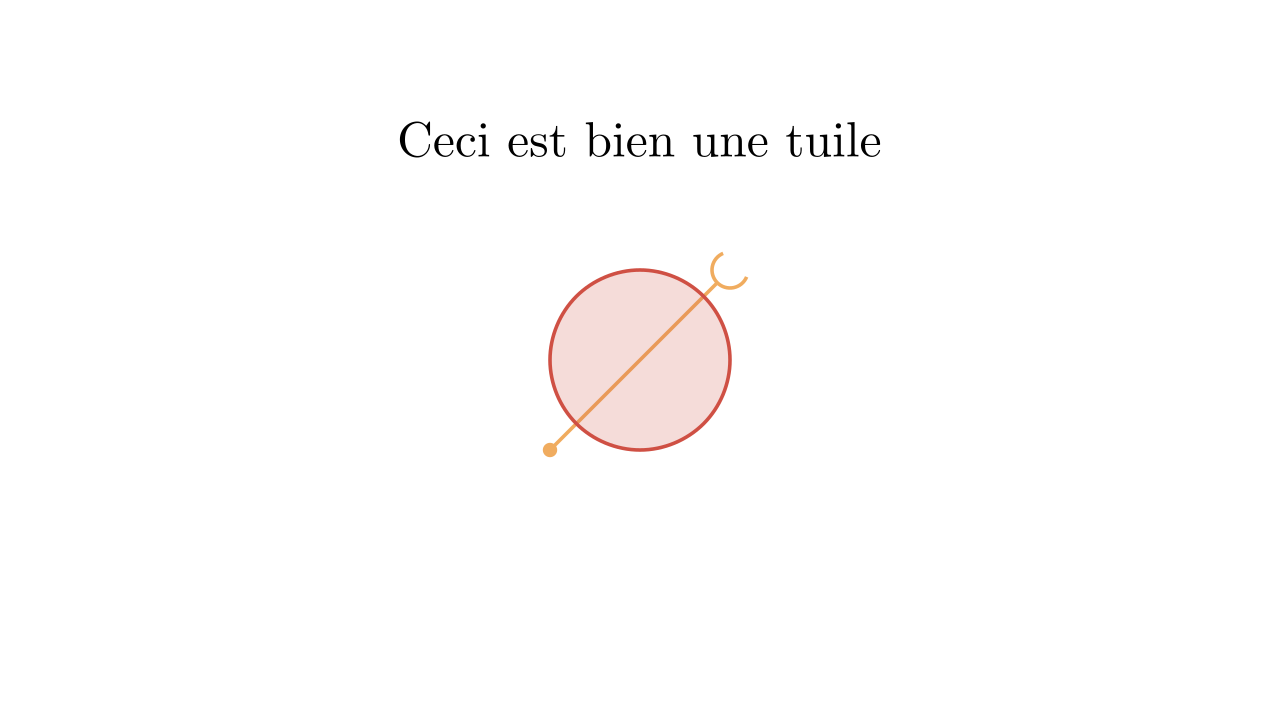

In [33]:
%%manim -qm -v ERROR --disable_caching FirstTile

circle = Circle(radius = 1, color = RED_CUSTOM , fill_opacity = 0.2)

class FirstTile(Scene):
    def construct(self):
        self.camera.background_color = BACKGROUND_COLOR
        crank = create_crank(DL, UR)
        self.add(crank)

        circle.move_to(ORIGIN)
        self.add(circle)

        comment = Tex('''Ceci est bien une tuile''')#.to_edge(UR)
        comment.height = 0.4
        comment.color = TITLE_COLOR
        comment.next_to(circle,direction = 5*UP)
        self.add(comment)



Manim Community v0.18.1

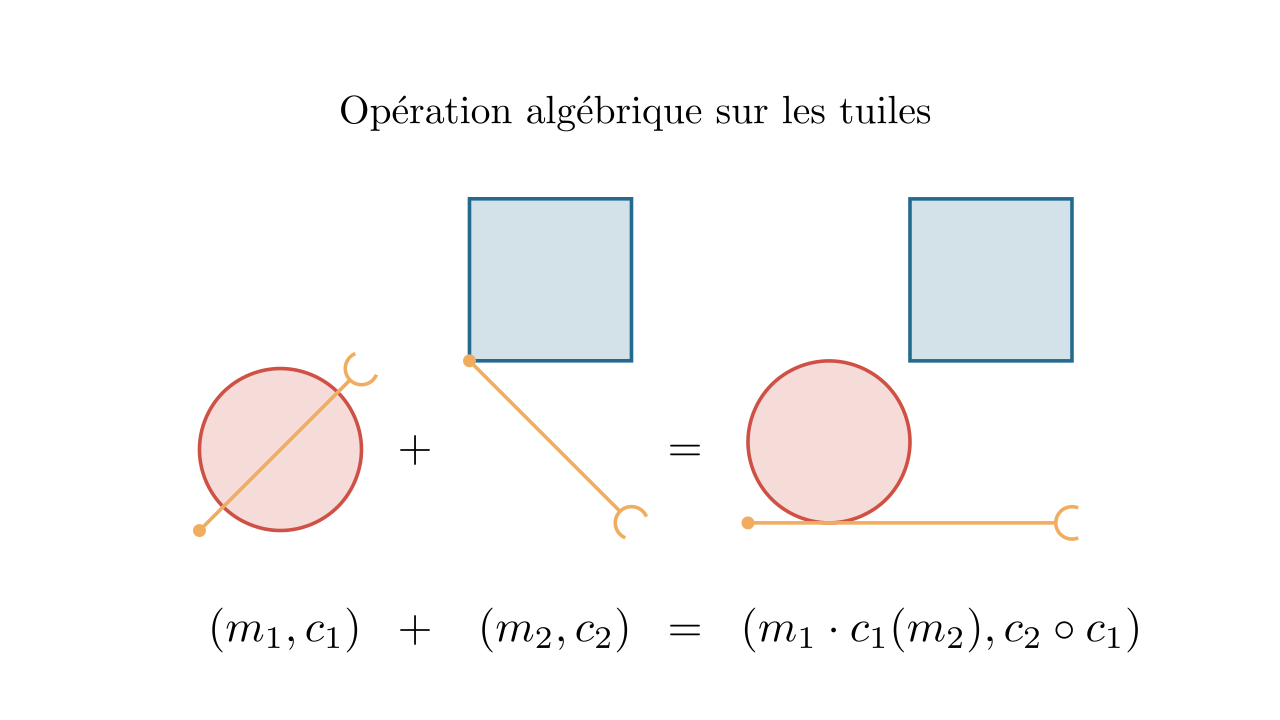

In [34]:
%%manim -qm -v ERROR --disable_caching TileAlgebra

class TileAlgebra(Scene):
    def construct(self):
        self.camera.background_color = BACKGROUND_COLOR
        circle = Circle(radius = 1., color = RED_CUSTOM , fill_opacity = 0.2)
        square = Square( color = BLUE_CUSTOM, fill_opacity = 0.2)

        result = VGroup(*[
            circle.copy(),
            square.copy().shift(2*UR),
            create_crank(DL, 3* RIGHT + DOWN)])
        result.scale(0.9)

        crank_circle = create_crank(DL, UR)
        circle.move_to(ORIGIN)
        circle_tile = VGroup(*[circle,crank_circle])
        circle_tile.scale(0.9)

        plus = MathTex("+")
        plus.color = TEXT_COLOR


        crank_square = create_crank(UL, DR)
        square.move_to(ORIGIN + 2*UP)
        square_tile = VGroup(*[square,crank_square])
        square_tile.scale(0.9)

        equals = MathTex("=")
        equals.color = TEXT_COLOR

        circle_tile.shift(LEFT * 4)
        plus.shift(LEFT * 2.5)
        square_tile.shift(LEFT * 1)
        equals.shift(RIGHT * 0.5)
        result.shift(RIGHT * 2)

        operation = VGroup(*[
            circle_tile,
            plus,
            square_tile,
            equals,
            result])
        operation.shift(DOWN)
        self.add(operation)

        comment = Tex('''Opération algébrique sur les tuiles''')#.to_edge(UR)
        comment.height = 0.4
        comment.next_to(operation,direction = 3*UP)
        comment.color = TITLE_COLOR
        self.add(comment)

        semigroup = MathTex("(m_1, c_1)", "+" , "(m_2,c_2)", "=" , "(m_1 \cdot c_1(m_2), c_2 \circ c_1)")

        semigroup.color = TEXT_COLOR

        for i in range(len(semigroup)) :
            semigroup[i].move_to(np.array([operation[i].get_center()[0], -1, 0]))
        semigroup[-1].next_to(semigroup[-2], direction = RIGHT * 2)
        semigroup.shift(DOWN * 2)
        self.add(semigroup)

Manim Community v0.18.1

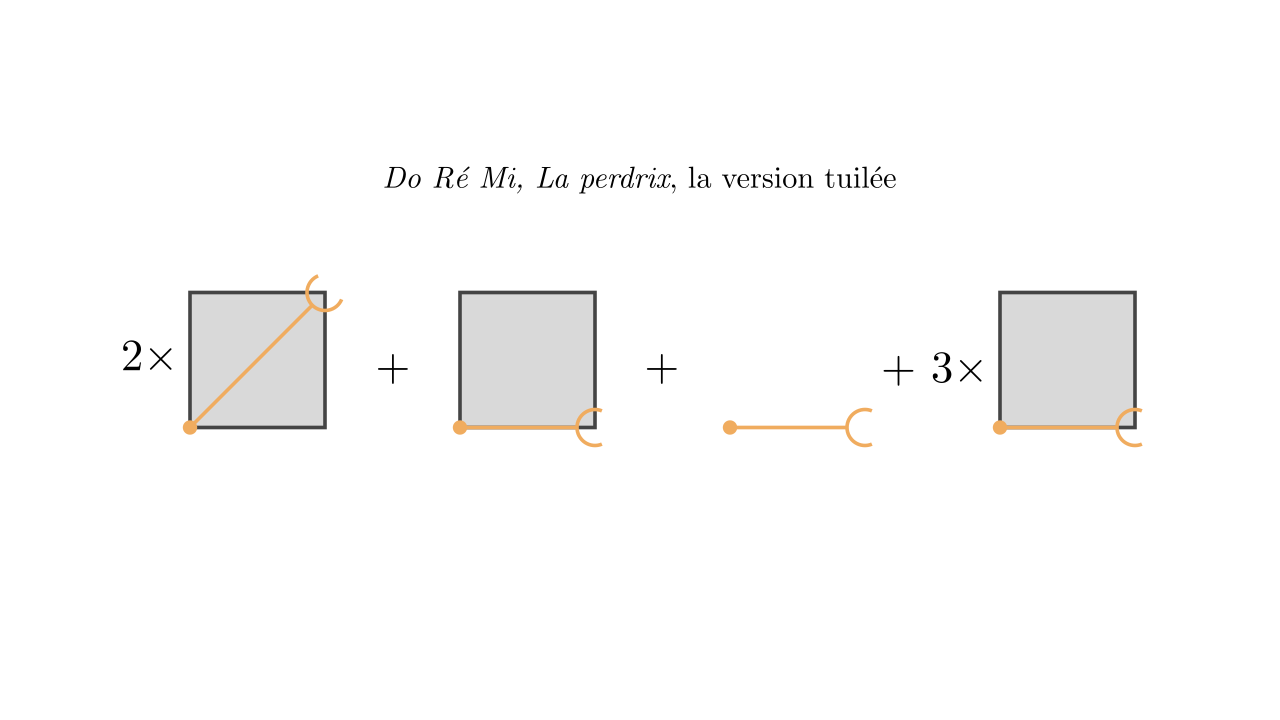

In [35]:
%%manim -qm -v ERROR --disable_caching DoremiAlgebra

SIZE_TILE = 1.5

sq = Square( fill_opacity = 0.2, side_length = SIZE_TILE)
sq.color = NOTE_COLOR
sq.shift(RIGHT * SIZE_TILE /2)
crankup = create_crank(DOWN *SIZE_TILE /2, UR * SIZE_TILE +DOWN *SIZE_TILE /2 )
crankright = create_crank(DOWN *SIZE_TILE /2, DOWN *SIZE_TILE /2 + RIGHT * SIZE_TILE)

tileup = VGroup(*[sq,crankup])
tileright = VGroup(*[sq.copy(),crankright.copy()])
silence = crankright


plus = MathTex("+")

class DoremiAlgebra(Scene):
    def construct(self):
        self.camera.background_color = BACKGROUND_COLOR
        tileup.shift(5*LEFT)
        self.add(tileup)
        twotimes = MathTex("2 \\times ").next_to(tileup,LEFT * 0.5)
        twotimes.color = TEXT_COLOR
        self.add(twotimes)
        tileright.shift(2*LEFT)
        self.add(tileright)
        plus1 = MathTex("+").next_to(tileright,2* LEFT)
        plus1.color = TEXT_COLOR
        self.add(plus1)
        plus2 = MathTex("+").next_to(tileright,2* RIGHT)
        plus2.color = TEXT_COLOR
        self.add(plus2)
        silence.shift(RIGHT)
        self.add(silence)
        right2 = tileright.copy()
        right2.shift(RIGHT *6)
        self.add(right2)
        plus3times = MathTex("+ ~3\\times").next_to(right2,LEFT * 0.5)
        plus3times.color = TEXT_COLOR

        self.add(plus3times)

        comment = Tex('''\emph{Do Ré Mi, La perdrix}, la version tuilée''')#.to_edge(UR)
        comment.height = 0.3
        comment.shift(2*UP)
        comment.color = TITLE_COLOR
        self.add(comment)

        """ circle = Circle(radius = 1., color = RED_CUSTOM , fill_opacity = 0.2)
        square = Square( color = BLUE_CUSTOM, fill_opacity = 0.2)

        result = VGroup(*[
            circle.copy(),
            square.copy().shift(2*UR),
            create_crank(DL, 3* RIGHT + DOWN)])
        result.scale(0.9)

        crank_circle = create_crank(DL, UR)
        circle.move_to(ORIGIN)
        circle_tile = VGroup(*[circle,crank_circle])
        circle_tile.scale(0.9)

        plus = MathTex("+")


        crank_square = create_crank(UL, DR)
        square.move_to(ORIGIN + 2*UP)
        square_tile = VGroup(*[square,crank_square])
        square_tile.scale(0.9)

        equals = MathTex("=")

        circle_tile.shift(LEFT * 4)
        plus.shift(LEFT * 2.5)
        square_tile.shift(LEFT * 1)
        equals.shift(RIGHT * 0.5)
        result.shift(RIGHT * 2)

        operation = VGroup(*[
            circle_tile,
            plus,
            square_tile,
            equals,
            result])
        operation.shift(DOWN)
        self.add(operation)

        comment = Tex('''\emph{Do Ré Mi, La perdrix}, la version tuilée''')#.to_edge(UR)
        comment.height = 0.4
        comment.next_to(operation,direction = 3*UP)
        self.add(comment)

        semigroup = MathTex("(f,m)", "+" , "(f',m')", "=" , "(f'\circ f, m' \wedge m \circ f)")

        for i in range(len(semigroup)) :
            semigroup[i].move_to(np.array([operation[i].get_center()[0], -1, 0]))
        semigroup[-1].next_to(semigroup[-2], direction = RIGHT * 2)
        semigroup.shift(DOWN * 2)
        self.add(semigroup) """

Manim Community v0.18.1

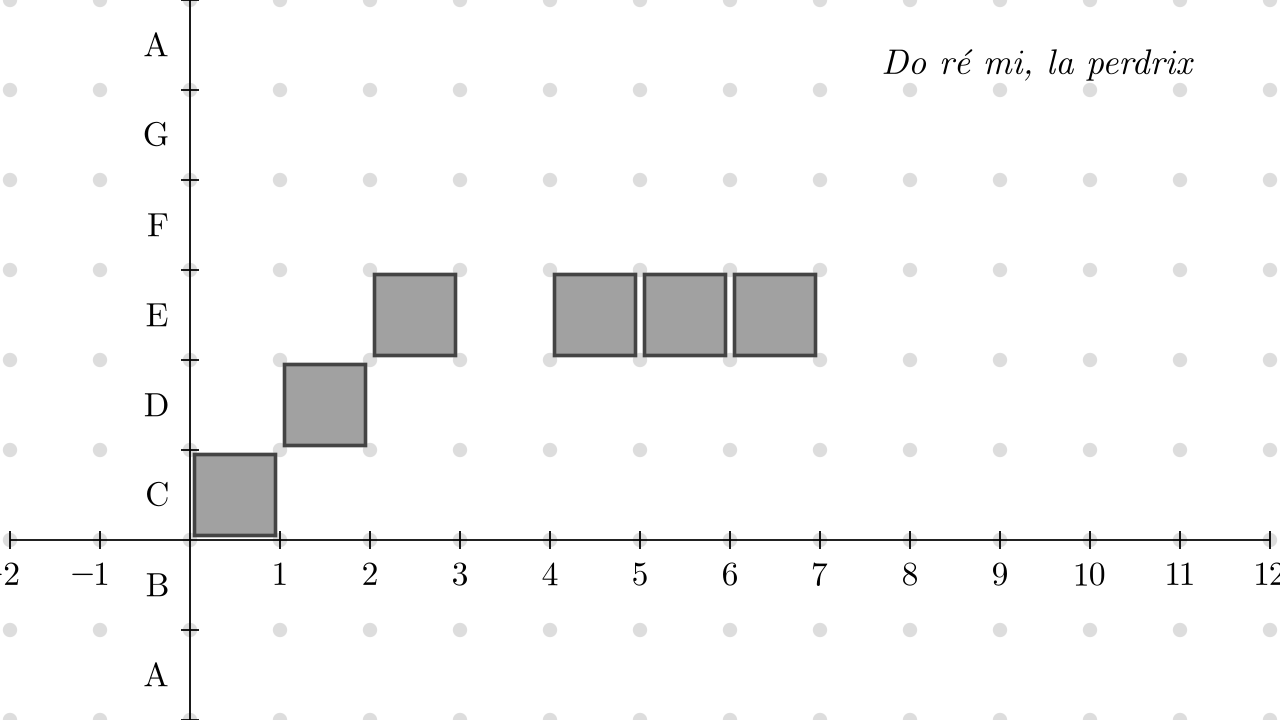

In [36]:
%%manim -qm DoReMiMotif

class DoReMiMotif(Scene) :
    def construct(self) :
      self.camera.background_color = BACKGROUND_COLOR
      self.add(grid)
      self.add(midi_ax)
      comment = Tex('''\emph{Do ré mi, la perdrix}''').to_edge(UR)
      comment.height = 0.35
      comment.color = TITLE_COLOR
      self.add(comment)

      self.add(doremi_notes)


      self.add(laperdrix_notes)



Manim Community v0.18.1

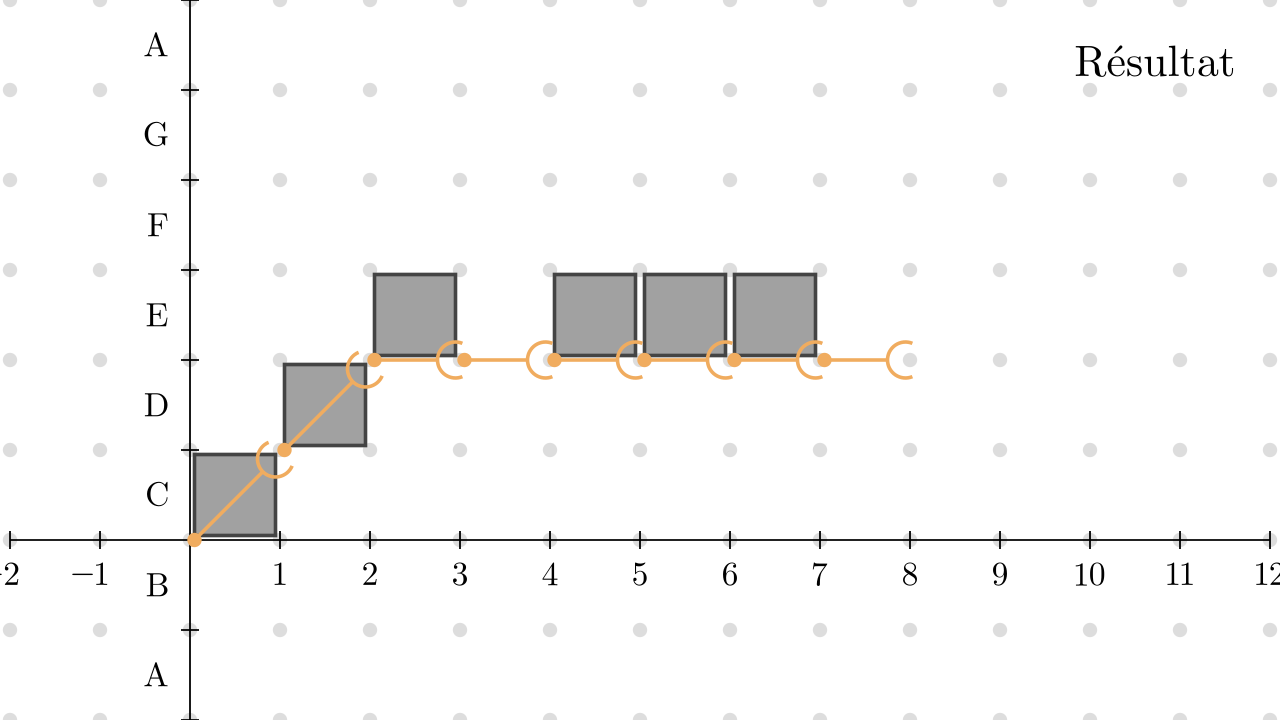

In [37]:
%%manim -qm DoReMiTuile0

cranks_l = [
    create_crank(square1.get_corner(DL), square1.get_corner(UR)),
    create_crank(square2.get_corner(DL), square2.get_corner(UR)),
    create_crank(square3.get_corner(DL), square3.get_corner(DR)),
    create_crank(square3.get_corner(DR) + 0.1 * RIGHT, square4.get_corner(DL) + 0.1 * LEFT),
    create_crank(square4.get_corner(DL), square4.get_corner(DR)),
    create_crank(square5.get_corner(DL), square5.get_corner(DR)),
    create_crank(square6.get_corner(DL), square6.get_corner(DR)),
    create_crank(square6.get_corner(DR)+  0.1 * RIGHT, square6.get_corner(DR) + RIGHT),
  ]
cranks = VGroup(*cranks_l)
cranks.shift(0.05 * DOWN)

class DoReMiTuile0(Scene) :
    def construct(self) :
      self.camera.background_color = BACKGROUND_COLOR
      self.add(grid)
      self.add(midi_ax)
      comment = Tex('''Résultat''').to_edge(UR)
      comment.height = 0.35
      comment.color = TITLE_COLOR
      self.add(comment)

      self.add(doremi_notes)


      self.add(laperdrix_notes)

      self.add(cranks)


In [38]:
%%manim -qm DoReMiTuile1

bgs = VGroup(*[bg_doremi.copy(),bg_laperdrix.copy()])

class DoReMiTuile1(Scene) :
  def construct(self) :
    self.camera.background_color = BACKGROUND_COLOR
    self.add(grid)
    self.add(midi_ax)
    comment = Tex('''Tuile hiérarchique''').to_edge(UR)
    comment.height = 0.3
    comment.color = TITLE_COLOR

    background_comment = BackgroundRectangle(comment, fill_opacity = 1.0)
    background_comment.color = BGTEXT_COLOR
    self.add(background_comment)
    self.add(comment)
    self.add(doremi_notes,laperdrix_notes)

    self.add(cranks)

    bgs.generate_target()
    for bg in bgs.target :
      bg.set_fill(opacity = 0.2)

    big_cranks = VGroup(*[
      create_crank(bgs[0].get_corner(DL), bgs[1].get_corner(DL) + 0.1 * DL),
      create_crank(bgs[1].get_corner(DL), bgs[1].get_corner(DR))
    ])
    self.play(FadeIn(bgs))
    self.add(cranks)
    cranks.generate_target()
    cranks.target = big_cranks



    self.play(
      MoveToTarget(cranks),
      # FadeOut(doremi),
      # FadeOut(laperdrix),
      run_time = 1.5
    )


Manim Community v0.18.1

In [39]:
%%manim -qm Inversion3




square1 = Square(
    side_length = SIZE_SQUARE,
    color = NOTE_COLOR,
    fill_opacity = 0.5)
square1.move_to(UR/2 + OFFSET)
square2 = square1.copy()
square2.shift(UR)
square3 = square2.copy()
square3.shift(UR)
square4 = square3.copy()
square4.shift(RIGHT * 2)
square5 = square4.copy()
square5.shift(RIGHT)
square6 = square5.copy()
square6.shift(RIGHT)

doremi_notes = VGroup(*[square1,square2, square3])
doremi_notes.stretch_to_fit_width(width = doremi_notes.width/3)
bg_laperdrix = BackgroundRectangle(
    doremi_notes,
    color=RED_CUSTOM,
    fill_opacity = 0.,
    stroke_width = 3,
    stroke_opacity = 1.)

doremi = VGroup(*[doremi_notes,bg_laperdrix])
doremi.shift(LEFT)

laperdrix_notes = VGroup(*[square4,square5, square6])
laperdrix_notes.stretch_to_fit_width(width = laperdrix_notes.width/3)

bg_laperdrix = BackgroundRectangle(
    laperdrix_notes,
    color=BLUE_CUSTOM,
    fill_opacity = 0.,
    stroke_width = 3,
    stroke_opacity = 1.)

laperdrix = VGroup(*[laperdrix_notes,bg_laperdrix])
laperdrix.shift(11/3*LEFT)

mifasol = doremi.copy()
mifasol.shift(8/3*RIGHT + 2 * UP)

senvole = laperdrix.copy()
senvole.shift(8/3*RIGHT + 2 * UP)

fa = Square(
side_length = SIZE_SQUARE,
color = NOTE_COLOR,
fill_opacity = 0.5)
fa.shift(UR/2)

mi = fa.copy()
mi.shift(DR)

re = mi.copy()
re.shift(DR)

famire_notes = VGroup(*[fa,mi,re])
famire_notes.stretch_to_fit_width(width = famire_notes.width/3)


bg_famire = BackgroundRectangle(
famire_notes,
color= PURPLE_CUSTOM,
fill_opacity = 0.,
stroke_width = 3,
stroke_opacity = 1.)

famire = VGroup(*[famire_notes, bg_famire])
famire.shift(UP + 2/3 * LEFT)
famire[1].color = BLUE_CUSTOM

dansunpres = senvole.copy()
dansunpres.shift(8/3*RIGHT + 3*DOWN)


miredo = famire.copy()
miredo.shift(8/3*RIGHT + DOWN)

tombeeau = dansunpres.copy()
tombeeau.shift(8/3*RIGHT + DOWN)

full_doremi = VGroup(*[doremi,laperdrix,mifasol,senvole,famire,dansunpres,miredo,tombeeau])



motif1 = VGroup(*[full_doremi[i] for i in range(2)])
bg_motif1 = BackgroundRectangle(
  motif1,
  color=RED_CUSTOM,
  fill_opacity = 0.,
  stroke_width = 3,
  stroke_opacity = 1.
  )
motif2 = VGroup(*[full_doremi[i] for i in range(2,4)])

bg_motif2 = BackgroundRectangle(
  motif2,
  color=RED_CUSTOM,
  fill_opacity = 0.,
  stroke_width = 3,
  stroke_opacity = 1.
)

motif3 = VGroup(*[full_doremi[i] for i in range(4,6)])
bg_motif3 = BackgroundRectangle(
  motif3,
  color=PURPLE_CUSTOM,
  fill_opacity = 0.,
  stroke_width = 3,
  stroke_opacity = 1.
  )

motif4 = VGroup(*[full_doremi[i] for i in range(6,8)])
bg_motif4 = BackgroundRectangle(
  motif4,
  color=PURPLE_CUSTOM,
  fill_opacity = 0.,
  stroke_width = 3,
  stroke_opacity = 1.
)

bg_motifs = VGroup(*[bg_motif1,bg_motif2,bg_motif3,bg_motif4])


func_niveau2 = Tex(
        "$(0,C) \mapsto$", " Up",'''

''',"$(8,E) \mapsto$", " Up",'''

''',"$(16,F) \mapsto$", " Down",'''

''',"$(24,E) \mapsto$", " Down",
    )

func_niveau2[1].color = func_niveau2[4].color = RED_CUSTOM
func_niveau2[7].color = func_niveau2[10].color = BLUE_CUSTOM

func_niveau2.move_to(RIGHT * 5.5 + 2*UP)
func_niveau2.width = 1.9

untrans_full = full_doremi.copy()
for i in range(len(untrans_full)) :
  untrans_full[i][1].set_fill(opacity = 0.5)

untrans_full[4][0] = untrans_full[0][0].copy().shift(5*RIGHT + RIGHT/3 + UP)
untrans_full[4][1].color = RED_CUSTOM
untrans_full[5].shift(2*UP)
untrans_full[6][0] = untrans_full[0][0].copy().shift(8*RIGHT )
untrans_full[6][1].color = RED_CUSTOM
untrans_full[7].shift(2*UP)



for motif in bg_motifs :
  motif.set_fill(opacity = 0.2)

untrans_bgs = bg_motifs.copy()

untrans_bgs[2].color = RED_CUSTOM
untrans_bgs[3].color = RED_CUSTOM



class Inversion3(Scene) :
  def construct(self) :
    self.camera.background_color = BACKGROUND_COLOR
    self.add(midi_ax)
    comment = Tex('''Inversion''').to_edge(UR)
    comment.height = 0.4
    comment.color = TEXT_COLOR

    self.add(comment)

    self.add(untrans_full)
    self.add(untrans_bgs)

    untrans_full.generate_target()
    untrans_full.target = full_doremi
    for i in range(len(untrans_full)) :
      untrans_full.target[i][1].set_fill(opacity = 0.5)
    untrans_bgs.generate_target()
    untrans_bgs.target = bg_motifs

    self.pause(0.5)
    self.play(MoveToTarget(untrans_full), MoveToTarget(untrans_bgs),run_time = 3)



Manim Community v0.18.1